In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Datasets/Churn_Modelling.csv")

In [4]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
df = df.drop("Surname", axis=1)

In [6]:
df = df.drop("RowNumber", axis=1)

In [7]:
df = df.drop("CustomerId", axis=1)

In [8]:
df = df.drop("Geography", axis=1)

In [9]:
df = df.drop("Gender", axis=1)

In [10]:
df = df.drop("Balance", axis=1)

In [11]:
df.head(3)

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,1,1,1,101348.88,1
1,608,41,1,1,0,1,112542.58,0
2,502,42,8,3,1,0,113931.57,1


In [12]:
df.isnull().sum()

CreditScore        0
Age                0
Tenure             0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
input_data = df.iloc[:,:-1]
output_data = df.iloc[:,-1]

In [14]:
ss = StandardScaler()

In [15]:
ss.fit_transform(input_data)

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [16]:
input_data = pd.DataFrame(ss.fit_transform(input_data), columns=input_data.columns)

In [17]:
input_data

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,0.807737,0.646092,-1.030670,-0.125231


In [18]:
input_data.shape

(10000, 7)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data,test_size=0.2,random_state=42)

In [20]:
x_train.shape

(8000, 7)

# ANN

In [22]:
import sys
print(sys.executable)

C:\Users\PALLAVI\anaconda3\python.exe


In [23]:
!{sys.executable} -m pip install tensorflow

In [24]:
import tensorflow

In [25]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [26]:
from keras import backend as K
K.clear_session()

In [27]:
ann = Sequential()

In [83]:
ann.add(Dense(6,input_dim = 7,activation="relu",kernel_regularizer=l2(l2=0.01)))
ann.add(Dense(5, activation="relu",kernel_regularizer=l2(l2=0.01)))
ann.add(Dense(4, activation="relu",kernel_regularizer=l2(l2=0.01)))
ann.add(Dense(3, activation="relu",kernel_regularizer=l2(l2=0.01)))
ann.add(Dense(2, activation="relu",kernel_regularizer=l2(l2=0.01)))
ann.add(Dense(1, activation="sigmoid",kernel_regularizer=l2(l2=0.01)))

C:\Users\PALLAVI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
ann.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [87]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (8000, 7)
y_train shape: (8000,)
x_test shape: (2000, 7)
y_test shape: (2000,)


In [90]:
ann.fit(x_train, y_train,batch_size=100,epochs=50, validation_data=(x_test,y_test),callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7945 - loss: 0.7963 - val_accuracy: 0.8035 - val_loss: 0.7190
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7945 - loss: 0.6697 - val_accuracy: 0.8035 - val_loss: 0.6254
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7945 - loss: 0.6229 - val_accuracy: 0.8035 - val_loss: 0.5999
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7945 - loss: 0.6018 - val_accuracy: 0.8035 - val_loss: 0.5816
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7945 - loss: 0.5856 - val_accuracy: 0.8035 - val_loss: 0.5674
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7945 - loss: 0.5732 - val_accuracy: 0.8035 - val_loss: 0.5565
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7945 - loss: 0.5637 - val_accuracy: 0.8035 - val_loss: 0.5482
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7945 - loss: 0.5562 - val_accuracy: 0.8035 - val_loss

In [91]:
ann.history.history

{'accuracy': [0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798

In [92]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["accuracy"]

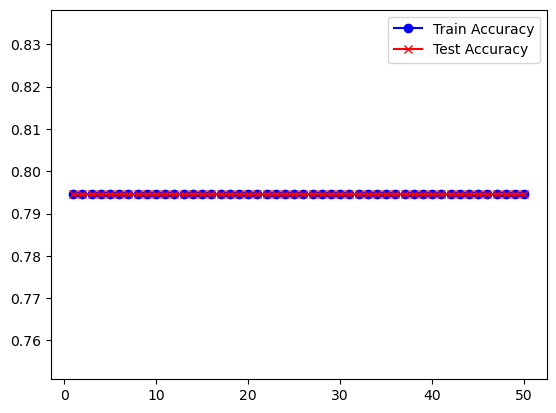

In [93]:
plt.plot(range(1, 51), train_accuracy, c='blue', label='Train Accuracy', marker='o')
plt.plot(range(1, 51), test_accuracy, c='red', label='Test Accuracy', marker='x')
plt.legend()
plt.show()

In [94]:
pr1 = ann.predict(x_train)
prd_data1 = []
for i in pr1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(1)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [95]:
pr = ann.predict(x_test)
prd_data = []
for i in pr:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [96]:
prd_data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(y_test,prd_data)*100

19.650000000000002

In [99]:
accuracy_score(y_train,prd_data1)*100   
# training accuracy > testing accuracy (overfitting)

20.549999999999997